In [1]:
import anndata
import pandas as pd
import scanpy as sc
import sklearn
import statsmodels.api as sm
import numpy as np
import math
import anndata as ad
import magic

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

annData = sc.read_h5ad("PapalexiSatija2021_eccite_RNA.h5ad")
annData.X.todense()
#convert the sparse matrix into a dense one
X=pd.DataFrame(annData.X.todense()) 
#obtain the data frame
cell_name=annData.obs.index
chr_name=annData.var.index
X.index=cell_name
X.columns=chr_name
print(X)

gene_symbol       AL627309.1  AP006222.2  RP4-669L17.10  RP11-206L10.3  \
AAACCTGAGCCAGAAC         0.0         0.0            0.0            0.0   
AAACCTGAGTGGACGT         0.0         0.0            0.0            0.0   
AAACCTGCATGAGCGA         0.0         0.0            0.0            0.0   
AAACCTGTCTTGTCAT         0.0         0.0            0.0            0.0   
AAACGGGAGAACAACT         0.0         0.0            0.0            0.0   
...                      ...         ...            ...            ...   
TTTGTCAGTCACTTCC         0.0         0.0            0.0            0.0   
TTTGTCAGTGACGGTA         0.0         0.0            0.0            0.0   
TTTGTCAGTTCCACAA         0.0         0.0            0.0            0.0   
TTTGTCATCACGCATA         0.0         0.0            0.0            0.0   
TTTGTCATCTGTACGA         0.0         0.0            0.0            0.0   

gene_symbol       RP11-206L10.2  RP11-206L10.9  LINC00115  FAM41C  SAMD11  \
AAACCTGAGCCAGAAC            0.0   

In [ ]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(X, genes= X.columns)
#plt.scatter(X_magic['FLT3'], X_magic['GRB2'], c=X_magic['SOS1'], s=1, cmap='inferno')

Calculating MAGIC...
  Running MAGIC on 20729 cells and 18649 genes.
  Calculating graph and diffusion operator...


C:\Users\Eurus2003\AppData\Roaming\Python\Python310\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculating PCA...
    Calculated PCA in 33.83 seconds.
    Calculating KNN search...


In [3]:
X_magic = X_magic.T
X_magic

,AAACCTGAGCCAGAAC,AAACCTGAGTGGACGT,AAACCTGCATGAGCGA,AAACCTGTCTTGTCAT,AAACGGGAGAACAACT,AAACGGGAGACAGAGA,AAACGGGAGCGCTTAT,AAACGGGGTAAGGGAA,AAACGGGGTTGTACAC,AAACGGGTCGGATGTT,...,TTTGGTTTCGACCAGC,TTTGTCAAGACTTGAA,TTTGTCAAGCGATTCT,TTTGTCAAGTTACGGG,TTTGTCAGTAGGCATG,TTTGTCAGTCACTTCC,TTTGTCAGTGACGGTA,TTTGTCAGTTCCACAA,TTTGTCATCACGCATA,TTTGTCATCTGTACGA
gene_symbol,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0.009369,0.004469,0.002002,0.012376,0.007319,0.006683,0.040703,0.026318,0.004705,0.012176,...,0.001094,0.049913,0.003590,0.020994,0.007753,0.023393,0.011261,0.003448,0.016082,0.018349
AP006222.2,0.053919,0.044595,0.084160,0.024291,0.069296,0.048614,0.064230,0.096701,0.030689,0.040747,...,0.022722,0.072129,0.005682,0.068128,0.033574,0.069847,0.105264,0.066760,0.042747,0.055137
RP4-669L17.10,0.001788,0.004833,0.000839,0.000810,0.000258,0.026577,0.015036,0.002797,0.005204,0.001005,...,0.000344,0.016028,0.000093,0.002643,0.003517,0.010683,0.000203,0.005226,0.000945,0.003852
RP11-206L10.3,0.022277,0.006938,0.004205,0.000707,0.009980,0.023498,0.007291,0.034097,0.002012,0.001213,...,0.002972,0.008582,0.001050,0.034199,0.018816,0.010866,0.001125,0.012291,0.018025,0.054915
RP11-206L10.2,0.020012,0.009373,0.013952,0.010243,0.012714,0.030962,0.037404,0.023993,0.028631,0.019366,...,0.012272,0.053014,0.002551,0.038564,0.031000,0.019658,0.016141,0.037899,0.035477,0.017512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3MBTL4,0.010901,0.000188,0.000019,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000045,...,0.000067,0.000000,0.000000,0.000000,0.000076,0.000000,0.000681,0.000228,0.001893,0.000000
CTB-31O20.9,0.001032,0.000022,0.000104,0.000000,0.000210,0.000907,0.000021,0.000000,0.000000,0.000000,...,0.000028,0.000000,0.000000,0.000000,0.000606,0.000000,0.000000,0.000253,0.000000,0.000000
AC092295.4,0.000077,0.000000,0.001222,0.000000,0.000019,0.000009,0.000000,0.000064,0.000000,0.000000,...,0.000000,0.000306,0.000000,0.000027,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000


In [5]:
subset = ['FLT3','GRB2','SOS1','NRAS','HRAS','KRAS','PIK3CA','PIK3R1','ARAF','STAT3']
#'FLT3',...CCND1 represents the AML genes
subset = list(set(subset))
sub_df = (X_magic.loc[subset,])
print(sub_df)

             AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                         
KRAS                 0.646213          0.392971          0.713113   
STAT3                2.961195          1.843091          1.623984   
GRB2                 5.636459          5.211396          4.737836   
FLT3                 0.145706          0.074304          0.061187   
ARAF                 0.465670          0.263895          0.363227   
PIK3CA               0.159056          0.075172          0.089276   
NRAS                 1.418415          0.809023          1.316352   
HRAS                 0.427233          0.216312          0.496642   
SOS1                 0.268850          0.168168          0.131696   
PIK3R1               0.689110          0.538251          0.844642   

             AAACCTGTCTTGTCAT  AAACGGGAGAACAACT  AAACGGGAGACAGAGA  \
gene_symbol                                                         
KRAS                 0.258537    

In [7]:
sub_df.loc['sequencing_depth'] = X_magic.apply(lambda x:x.sum(),axis=0)
print(sub_df)
df = sub_df

                  AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                              
KRAS                      0.646213          0.392971          0.713113   
STAT3                     2.961195          1.843091          1.623984   
GRB2                      5.636459          5.211396          4.737836   
FLT3                      0.145706          0.074304          0.061187   
ARAF                      0.465670          0.263895          0.363227   
PIK3CA                    0.159056          0.075172          0.089276   
NRAS                      1.418415          0.809023          1.316352   
HRAS                      0.427233          0.216312          0.496642   
SOS1                      0.268850          0.168168          0.131696   
PIK3R1                    0.689110          0.538251          0.844642   
sequencing_depth      16638.526978      10417.148726      12996.199550   

                  AAACCTGTCTTGTCAT  A

In [8]:
cells = df.columns
genes = df.index
sequencing_depth = (df.loc['sequencing_depth', :])
y = df[0:1]
y = y.T
def func(x):
    return x+1

def func1(x):
    return math.log(x+1.01)

def func2(x):
    return math.log(x+2)

def func3(x):
    return math.sqrt(x+1)+math.sqrt(x+2)-1.5

def func4(x):
    return math.sqrt(x+1.01)

sequencing_depth = pd.DataFrame(sequencing_depth)
x = sequencing_depth.applymap(func)
#x represents the log(sequencing_depth) data
model = sm.GLM(y,x,family=sm.families.Poisson())
#use the log(sequencing_depth) as the intercept of Poisson regression
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   KRAS   No. Observations:                20729
Model:                            GLM   Df Residuals:                    20728
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17003.
Date:                Mon, 16 Oct 2023   Deviance:                       4229.6
Time:                        20:29:01   Pearson chi2:                 4.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            -0.1367
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sequencing_depth -3.341e-05   6.51e-07  

                         0
AAACCTGAGCCAGAAC  0.126733
AAACCTGAGTGGACGT -0.443415
AAACCTGCATGAGCGA  0.100912
AAACCTGTCTTGTCAT -0.687211
AAACGGGAGAACAACT -0.494586
...                    ...
TTTGTCAGTCACTTCC  0.625876
TTTGTCAGTGACGGTA -0.058594
TTTGTCAGTTCCACAA  0.066281
TTTGTCATCACGCATA -0.254186
TTTGTCATCTGTACGA  0.140797

[20729 rows x 1 columns]


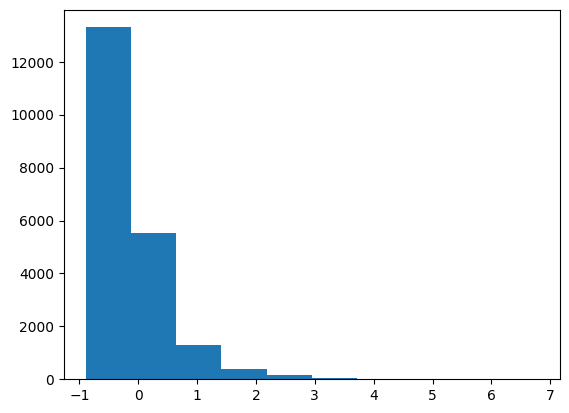

In [9]:
resid = results.resid_working
resid = pd.DataFrame(resid)
print(resid)
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resid)
working_residuals = resid
#working_residual is a dataframe storing thr working residual data
working_residuals.columns = [genes[0]]

In [10]:
#perform poisson regression for each gene/protein
for i in range(1,df.shape[0]-1):
    y = df[i:i+1].T
    model = sm.GLM(y,x,family=sm.families.Poisson())
    results = model.fit()
    #print(results.summary())
    resid=results.resid_working
    resid = pd.DataFrame(resid)
    resid.columns = [genes[i]]
    val = pd.concat([working_residuals,resid],axis = 1)
    working_residuals = val

In [11]:
working_residuals = working_residuals.applymap(func3)
print(working_residuals)

                      KRAS     STAT3      GRB2      FLT3      ARAF    PIK3CA  \
AAACCTGAGCCAGAAC  1.019809  1.100856  0.958017  3.773866  1.195876  1.955471   
AAACCTGAGTGGACGT  0.493678  0.966697  1.529519  0.734470  0.447593  0.342633   
AAACCTGCATGAGCGA  0.998696  0.751473  1.138835  1.065342  0.768222  0.707180   
AAACCTGTCTTGTCAT  0.205046  0.447925  1.126365 -0.208173 -0.086753 -0.066277   
AAACGGGAGAACAACT  0.437878  0.868089  1.333648  0.030387  0.336045  0.136018   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAGTCACTTCC  1.395554  1.193561  0.971465  4.657711  1.638304  3.052333   
TTTGTCAGTGACGGTA  0.863604  1.073360  1.087208  3.212228  1.510172  1.903304   
TTTGTCAGTTCCACAA  0.970066  1.229109  1.236959  1.790219  0.969489  1.136938   
TTTGTCATCACGCATA  0.684897  1.005114  1.414377  0.696571  0.684677  0.693257   
TTTGTCATCTGTACGA  1.031227  0.962020  0.994656  4.428217  1.334739  2.136679   

                      NRAS      HRAS   

Text(0.5, 1.0, 'ARAF')

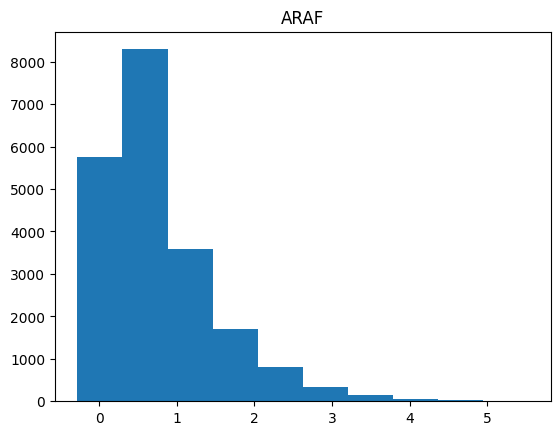

In [17]:
i = 4
plt.hist(working_residuals[genes[i]])
plt.title(genes[i])

In [18]:
wr_csv_data = working_residuals.to_csv('D:/SummerIntern/Datasets/MAGIC_PapalexiSatija2021_eccite_RNA_working_residuals2_exp2.csv', index = True)
print('\nCSV String:\n', wr_csv_data)


CSV String:
 None


             AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                         
STAT1               14.075841         11.476693          4.810128   
STAT3                2.961195          1.843091          1.623984   
GRB2                 5.636459          5.211396          4.737836   
RAF1                 1.064571          0.602793          0.747767   
CCND1                0.739694          0.892603          0.974663   
MYC                  0.627076          0.653566          1.206080   
BCL2L1               0.569807          0.360290          0.334038   
BCL2                 0.064169          0.085024          0.130891   
JAK2                 2.802022          2.369291          0.714331   
PDGFA                0.667758          0.241811          0.670223   
HRAS                 0.427233          0.216312          0.496642   
SOS1                 0.268850          0.168168          0.131696   

             AAACCTGTCTTGTCAT  AA

                     STAT1     STAT3      GRB2      RAF1     CCND1       MYC  \
AAACCTGAGCCAGAAC  1.338858  1.100856  0.958017  1.105810  0.600844  0.674503   
AAACCTGAGTGGACGT  2.166046  0.966697  1.529519  0.602136  0.764864  0.661840   
AAACCTGCATGAGCGA  0.788185  0.751473  1.138835  0.772436  0.819653  1.206443   
AAACCTGTCTTGTCAT  1.786804  0.447925  1.126365  0.232179  0.398201  0.280941   
AAACGGGAGAACAACT  1.904866  0.868089  1.333648  0.536071  0.925880  0.515715   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAGTCACTTCC  1.222406  1.193561  0.971465  1.337615  1.019486  0.797008   
TTTGTCAGTGACGGTA  1.161838  1.073360  1.087208  1.017693  1.159358  0.954169   
TTTGTCAGTTCCACAA  1.959383  1.229109  1.236959  0.984240  0.882993  0.646759   
TTTGTCATCACGCATA  1.671234  1.005114  1.414377  0.676903  0.844174  1.038673   
TTTGTCATCTGTACGA  1.257578  0.962020  0.994656  1.076186  0.820089  0.775342   

                    BCL2L1      BCL2   

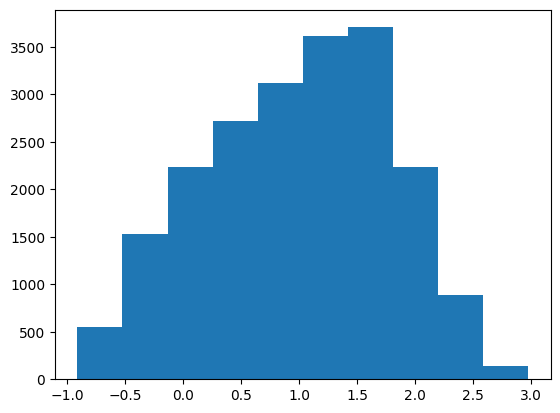

In [19]:
subset = ['PDGFA', 'JAK2', 'GRB2', 'SOS1', 'HRAS', 'RAF1', 
'STAT1', 'STAT3', 'BCL2', 'BCL2L1', 'MYC', 'CCND1']
#'FLT3',...CCND1 represents the AML genes
subset = list(set(subset))
sub_df = (X_magic.loc[subset,])
print(sub_df)
sub_df.loc['sequencing_depth'] = X_magic.apply(lambda x:x.sum(),axis=0)
print(sub_df)
df = sub_df
cells = df.columns
genes = df.index
sequencing_depth = (df.loc['sequencing_depth', :])
y = df[0:1]
y = y.T
def func(x):
    return x+1

def func1(x):
    return math.log(x+1.01)

def func2(x):
    return math.log(x+2)

def func3(x):
    return math.sqrt(x+1)+math.sqrt(x+2)-1.5

def func4(x):
    return math.sqrt(x+1.01)

sequencing_depth = pd.DataFrame(sequencing_depth)
x = sequencing_depth.applymap(func)
#x represents the log(sequencing_depth) data
model = sm.GLM(y,x,family=sm.families.Poisson())
#use the log(sequencing_depth) as the intercept of Poisson regression
results = model.fit()
print(results.summary())
resid = results.resid_working
resid = pd.DataFrame(resid)
print(resid)
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resid)
working_residuals = resid
#working_residual is a dataframe storing thr working residual data
working_residuals.columns = [genes[0]]
#perform poisson regression for each gene/protein
for i in range(1,df.shape[0]-1):
    y = df[i:i+1].T
    model = sm.GLM(y,x,family=sm.families.Poisson())
    results = model.fit()
    #print(results.summary())
    resid=results.resid_working
    resid = pd.DataFrame(resid)
    resid.columns = [genes[i]]
    val = pd.concat([working_residuals,resid],axis = 1)
    working_residuals = val

working_residuals = working_residuals.applymap(func3)
print(working_residuals)

Text(0.5, 1.0, 'STAT3')

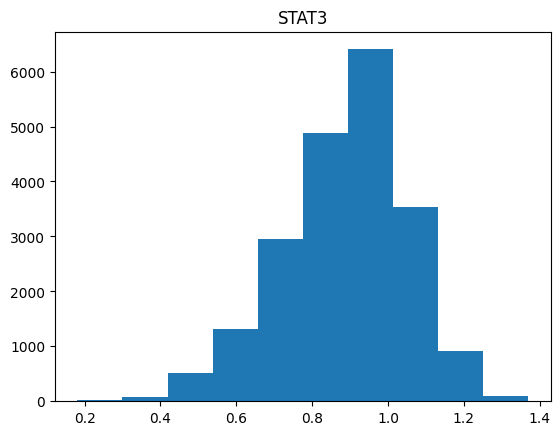

In [22]:
i = 1
plt.hist(working_residuals[genes[i]])
plt.title(genes[i])

In [23]:
wr_csv_data1 = working_residuals.to_csv('D:/SummerIntern/Datasets/MAGIC_PapalexiSatija2021_eccite_RNA_working_residuals2_exp1.csv', index = True)
print('\nCSV String:\n', wr_csv_data)


CSV String:
 None
